In [2]:
from pandas import read_csv, Series
from pandas.plotting import scatter_matrix
from os.path import join as path_join
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from sklearn.model_selection import train_test_split
from utils import simple_regression_analysis
from pipeline import get_pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81c628bd50>,
      dtype=object)

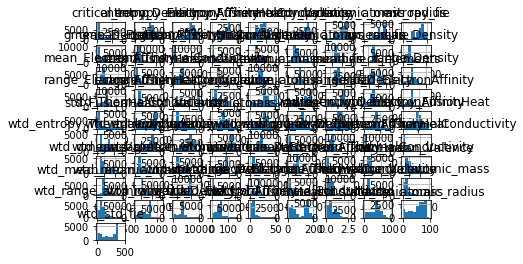

In [9]:
data = read_csv(path_join('./', 'data', 'train.csv'))
data.hist()

In [4]:
# train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, shuffle=True)

In [5]:
X, y = data[data.columns.difference(['critical_temp'])], data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y=y_train)
predictions = lin_reg.predict(X_test)
predictions = Series(predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
# plt.scatter(y_test, predictions)
# best_fit = LinearRegression()
# best_fit.fit(y_test, predictions)
# best_line = best_fit(y_test)
# plt.plot(y_test, best_line)
# print(f'mse {mse}')
# print(f'rmse {rmse}')

In [7]:
models = simple_regression_analysis(X_train, y_train, X_test, y_test, mean_squared_error)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
correlation_matrix = X_train.join(y_train).corr()
correlations = [(variable, correlation) for variable, correlation in correlation_matrix['critical_temp']
    .sort_values(ascending=False).items() if correlation >= 0.5]
correlations

In [ ]:
data.describe()

In [ ]:
features, corr_values = zip(*correlations)

In [ ]:
scatter_matrix(data[list(features)[0:5]], alpha=0.2, figsize=(30, 15))
plt.show()

In [ ]:
train_features = set(features) - {'critical_temp'}
lin_reg = LinearRegression()
lin_reg.fit(X_train[train_features], y=y_train)
predicts = lin_reg.predict(X_test[train_features])
predicts

In [ ]:
lin_mse = mean_squared_error(y_true= y_test, y_pred=predicts)
lin_rmse = sqrt(lin_mse)
lin_rmse

In [ ]:
X, y = data[data.columns.difference(['critical_temp'])], data['critical_temp']
pipeline = get_pipeline(X.columns)
prepared = pipeline.fit_transform(data)
X, y = prepared[prepared.columns.difference(['critical_temp'])], prepared['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.corr()